Deep Learning Predicting Diabetes Progression using Artificial Neural Networks
------------------------------------------------------------------------------------------------------------------

Steps of Preprocessing of data
--------------------------------------------
Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Normalization 
Step 9] - Encoding of Data  
Step 10] -Scaling  
Step 10] - Feature Selection
Step 11] - Model Building


# Comprehensive Assessment :

Problem Description:

Objective:
You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.

Dataset:
Use the Diabetes dataset available in the sklearn library.



# Key components to be fulfilled :

1.Loading and Preprocessing (4 marks)
        Load the Diabetes dataset from sklearn.
        Handle any missing values if present.
        Normalize the features to ensure better performance of the ANN model.

# Step 1: Import Necessary Library

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings 

In [3]:
warnings.filterwarnings('ignore')

# Step 2: Read DataSet

In [4]:
# Load diabetes dataset
diabetes_data = load_diabetes()

# Create a DataFrame
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(diabetes_data.feature_names)
df.columns

X = diabetes_data.data
y = diabetes_data.target



Dataset shape: (442, 11)

Feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
df.columns


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [5]:
#head
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
#tail
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


# Step 3: Sanity Check of Data

In [7]:
#Shape
df.shape

(442, 11)

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
#Finding Missing Values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

No missing values find. No need to treat missing values.

In [10]:
#Finding Duplicates 
df.duplicated().sum()



0

No duplictes found. And no need to handle those .

In [11]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

No Garbage values find

# Normalize the features to ensure better performance of the ANN model.


In [12]:
# Assuming 'target' is the label and other columns are features
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are normalized and can be used for ANN training.

print(X_train_scaled,"\n",X_test_scaled)

[[ 1.49836523  1.06136988  0.21990201 ...  0.71103773  0.54748197
  -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 ...  1.4842858  -0.01975653
   0.36723647]
 [ 0.08518241 -0.94217861  1.01898711 ... -0.06221033  0.3312366
  -0.31866022]
 ...
 [ 0.63475351 -0.94217861 -0.46502808 ... -0.83545839 -0.25375196
  -0.06144896]
 [-0.30736838 -0.94217861 -0.53352109 ... -0.06221033 -0.83072436
  -0.83308273]
 [-2.03459183 -0.94217861  0.56236706 ... -0.83545839 -0.13312789
  -0.06144896]] 
 [[ 9.48794133e-01 -9.42178611e-01 -1.68225039e-01 -3.54924745e-01
   2.63158584e+00  2.64916600e+00  4.29486950e-01  7.11037735e-01
   6.53600610e-01 -1.47186045e-01]
 [ 1.96942617e+00 -9.42178611e-01  7.45015079e-01  4.27541124e-01
  -5.11434037e-01 -3.33282444e-01  3.76314490e-02 -8.35458386e-01
  -4.96908703e-01 -4.90134388e-01]
 [ 1.34134492e+00  1.06136988e+00 -1.22563033e-01 -2.83791484e-01
   2.17022512e+00  1.04272578e+00  1.21319795e+00 -6.22103255e-02
   1.74360703e+00 -4.04397302e-01]
 [ 2.0

# Step 4- Exploratory Data Analysis


Perform EDA to understand the distribution of features and the target variable.


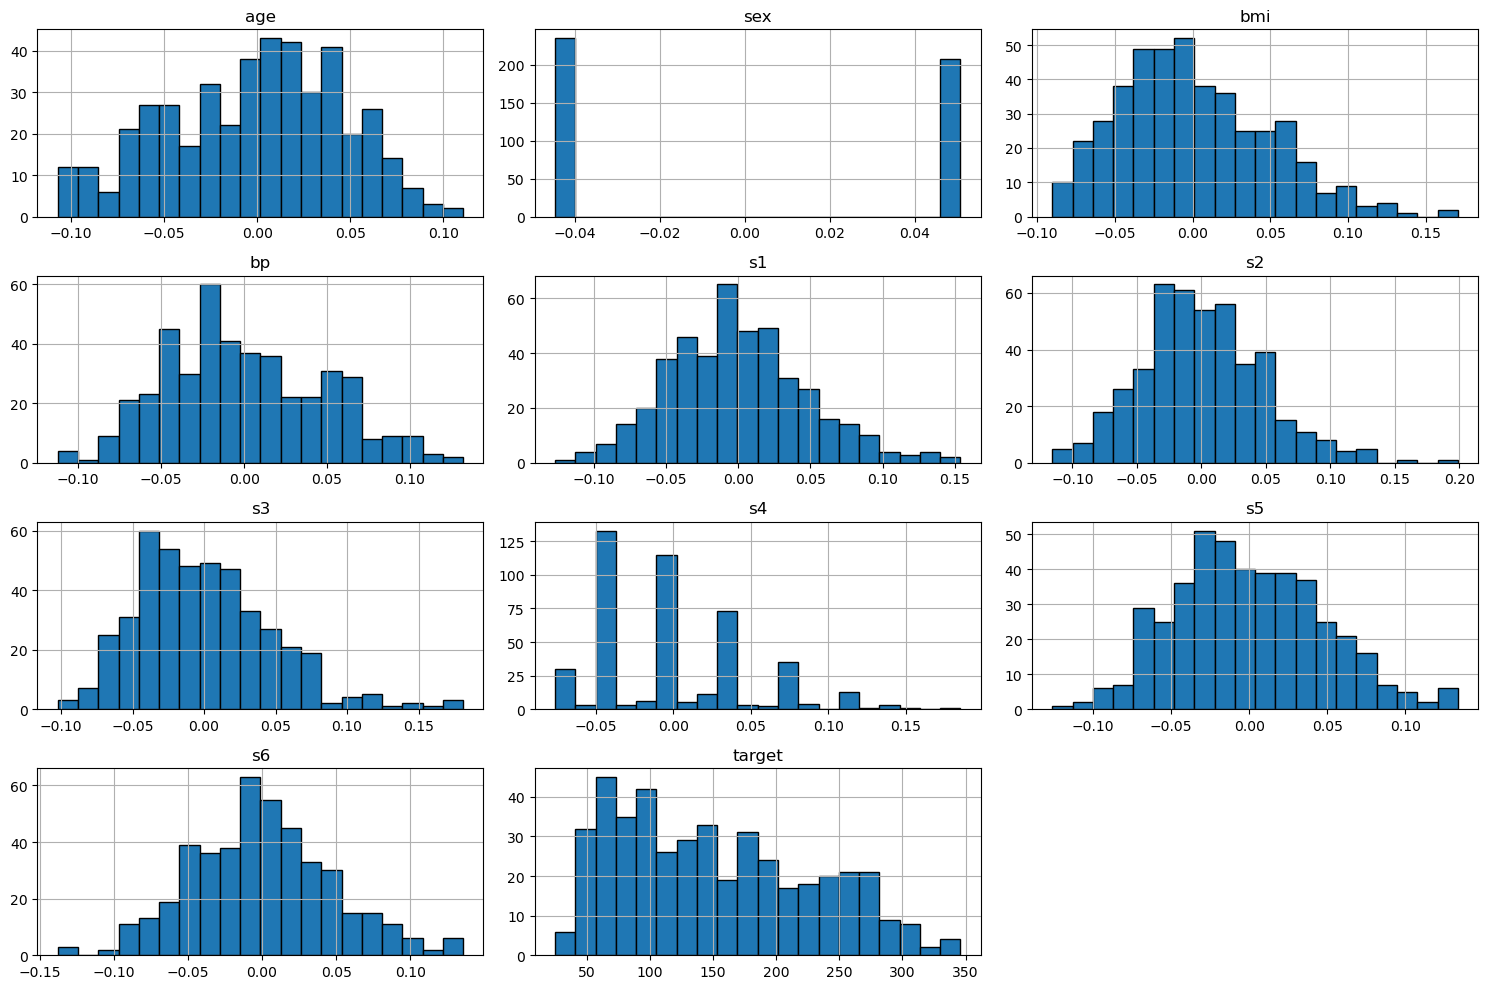

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


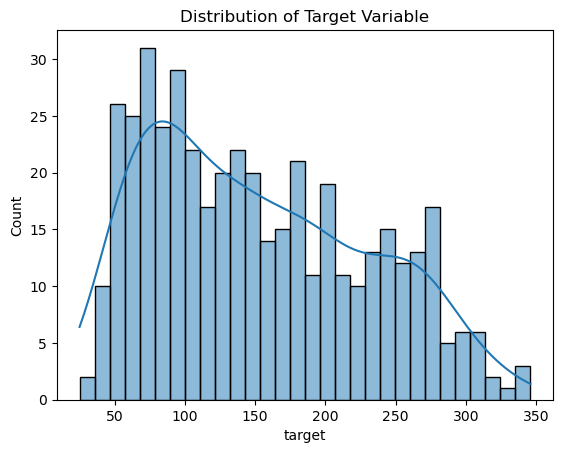

In [14]:
# Plot the distribution of the target variable
sns.histplot(df['target'], kde=True, bins=30)
plt.title('Distribution of Target Variable')
plt.show()


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (mean 0, std 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression


Check for Outliers:
Outliers can skew your model, so it's important to visualize them.

a. Boxplot for detecting outliers in features:


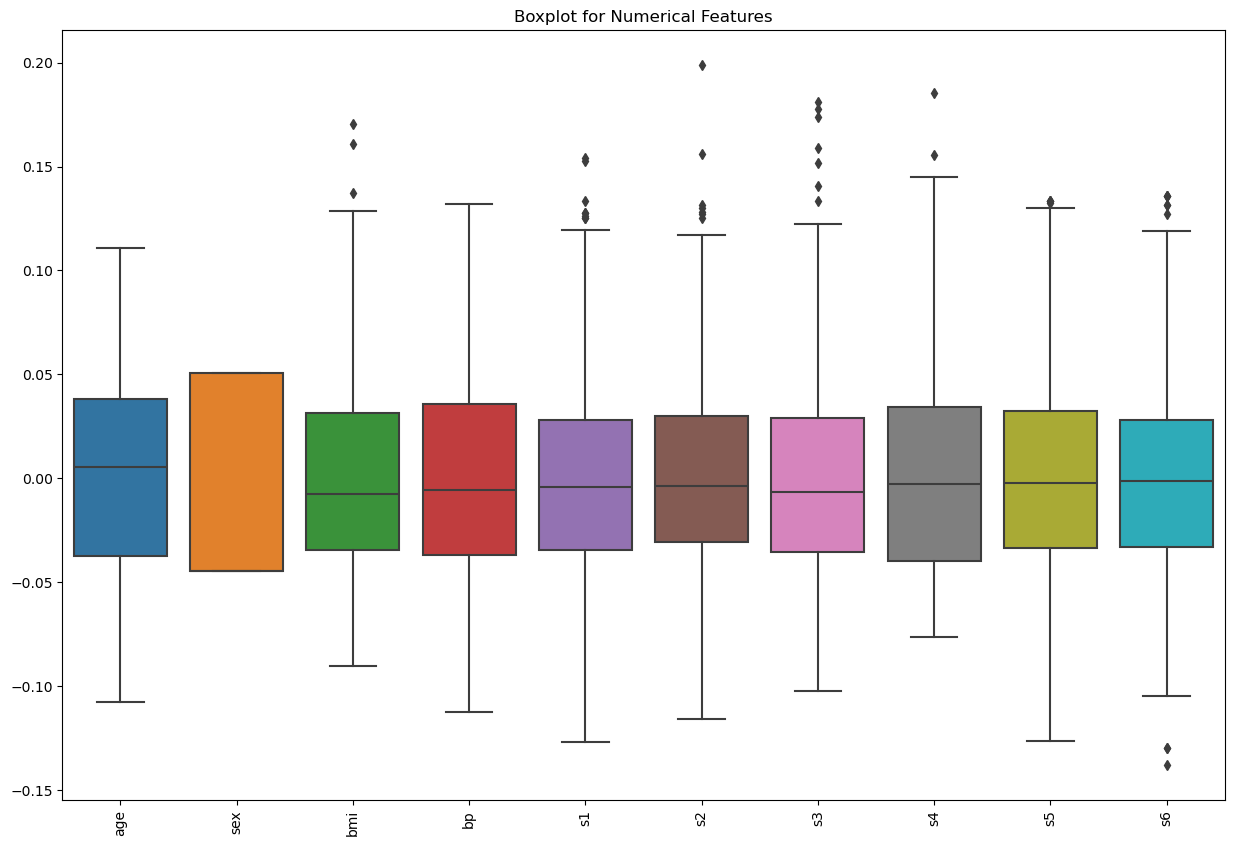

In [17]:
# Boxplots to check for outliers in numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['target']))
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Features')
plt.show()


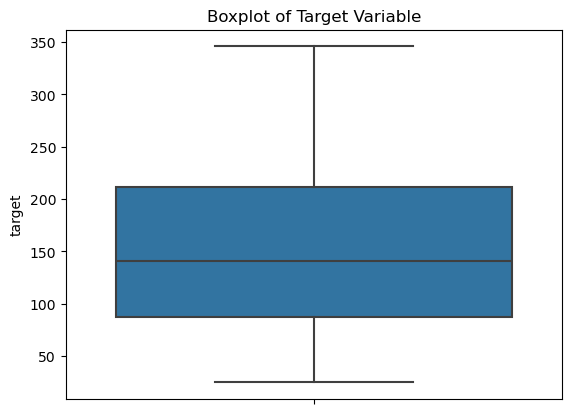

In [18]:
# Boxplot to check for outliers in the target variable
sns.boxplot(y=df['target'])
plt.title('Boxplot of Target Variable')
plt.show()


a. Correlation matrix:


In [19]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

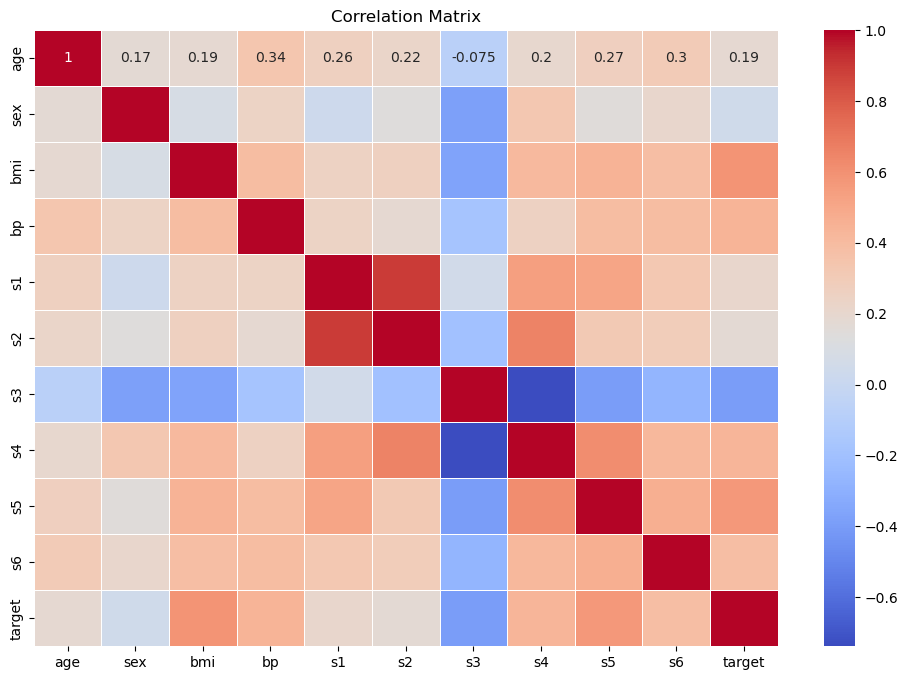

In [21]:

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


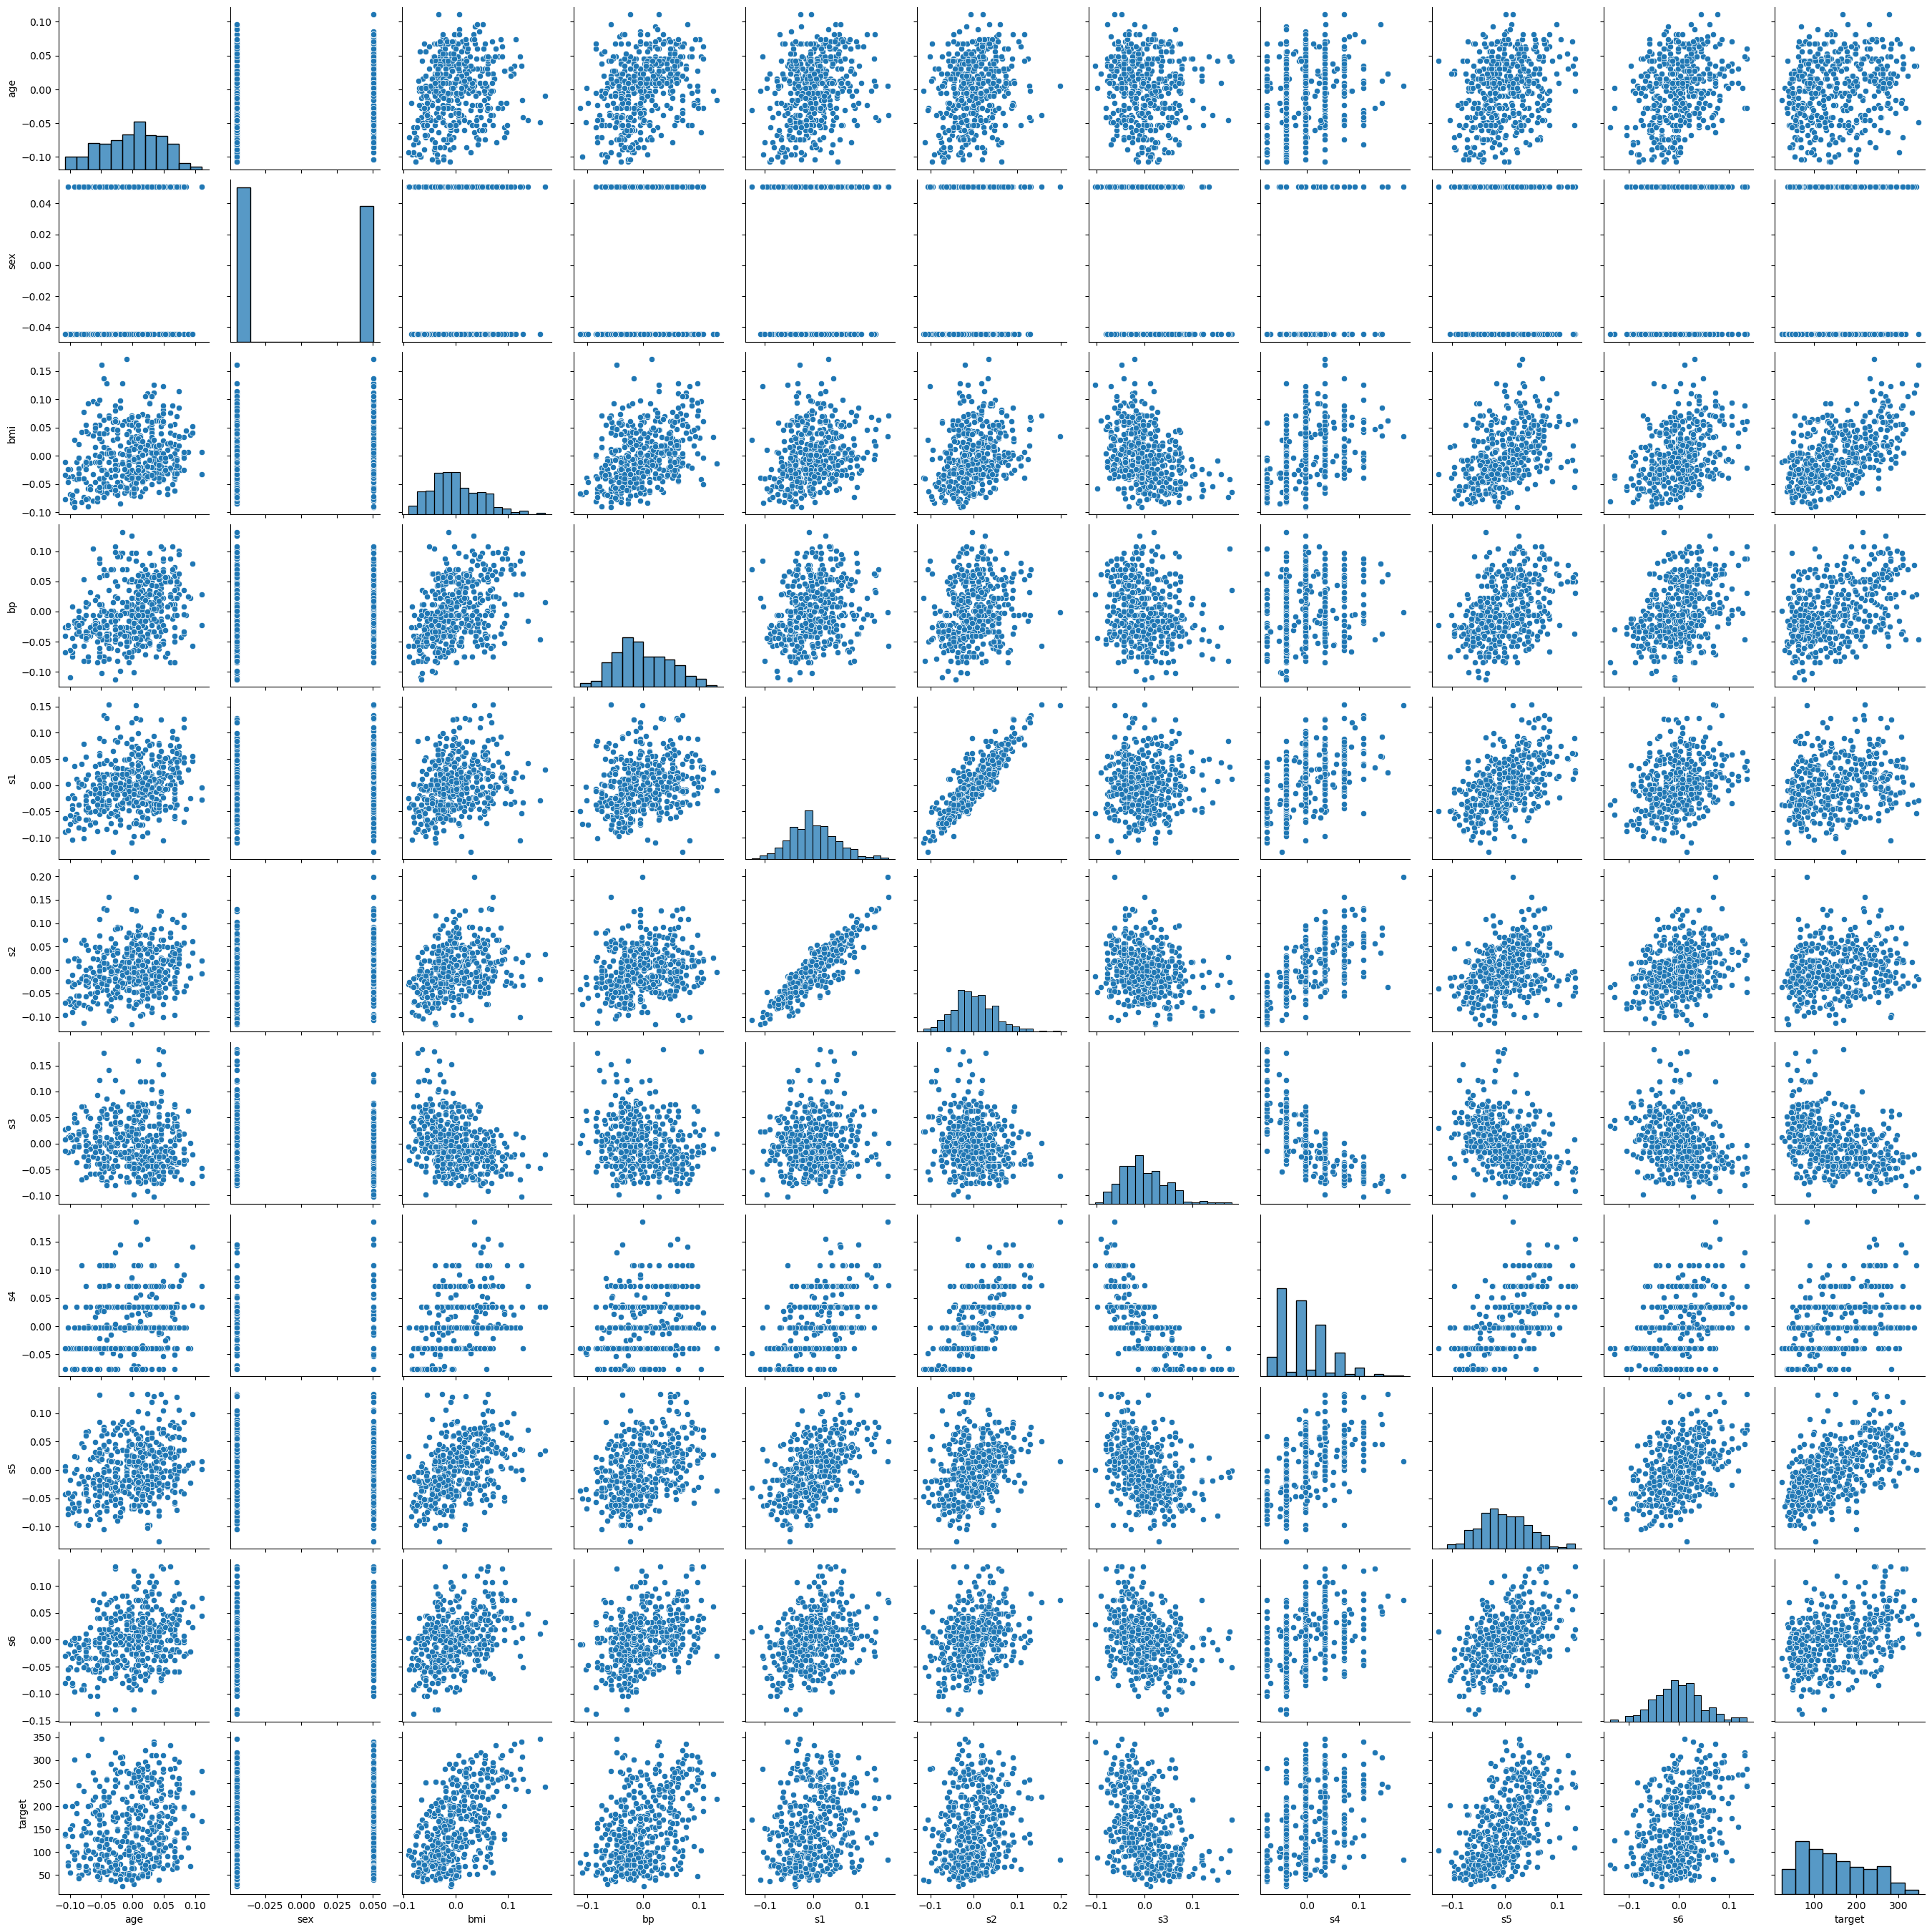

In [26]:
# Pairplot to visualize relationships between pairs of features
sns.pairplot(df)
plt.show()


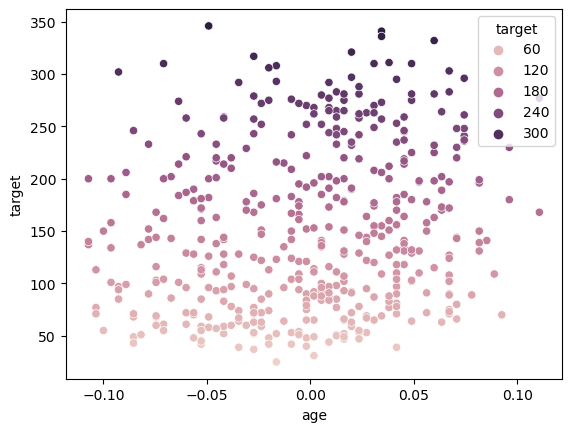

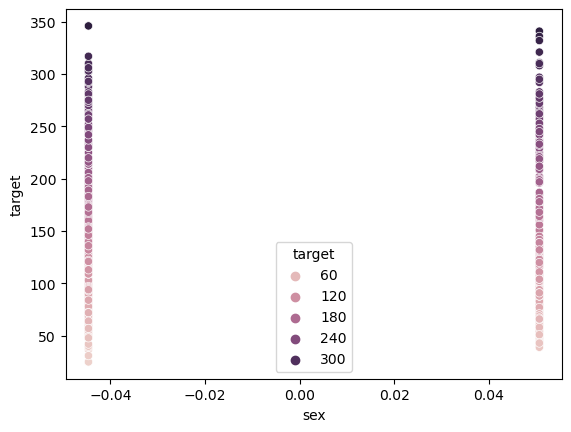

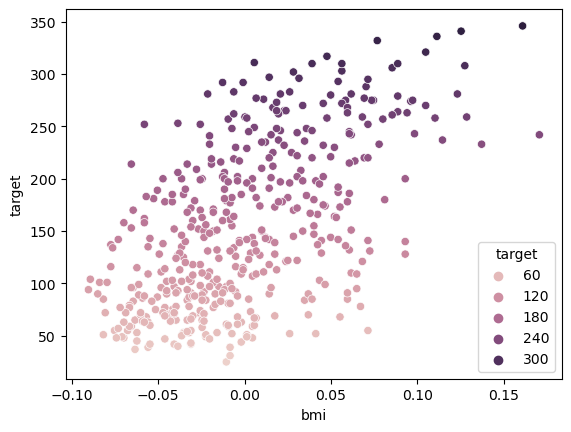

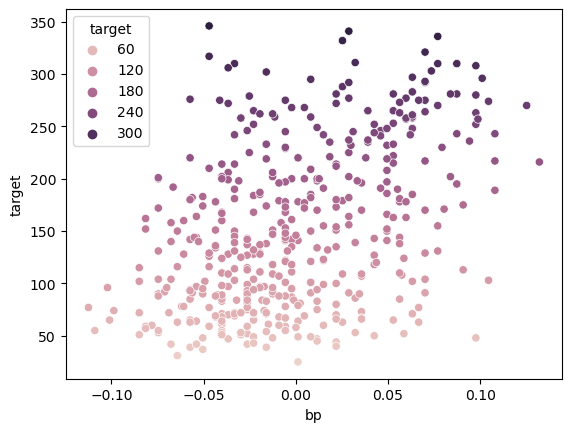

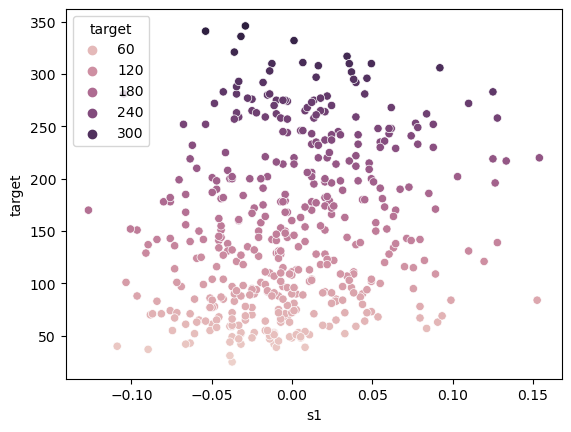

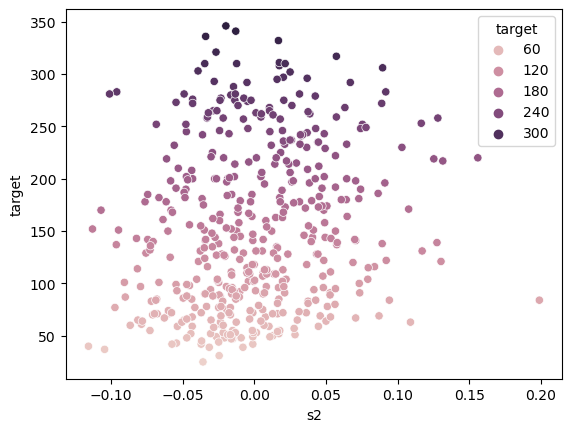

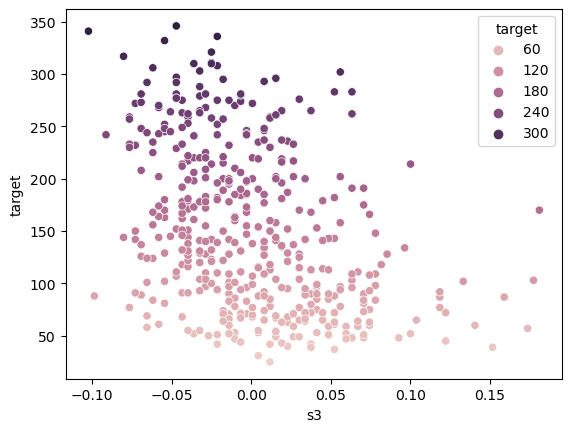

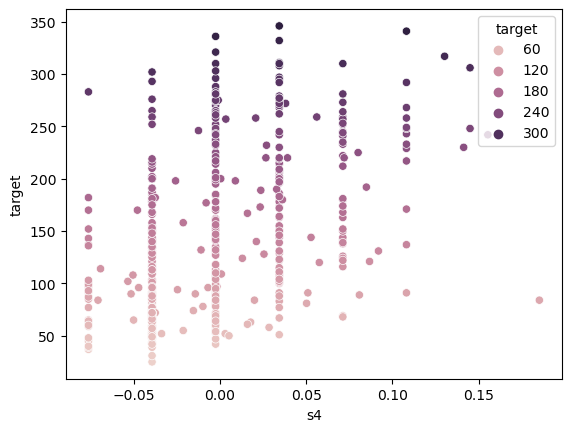

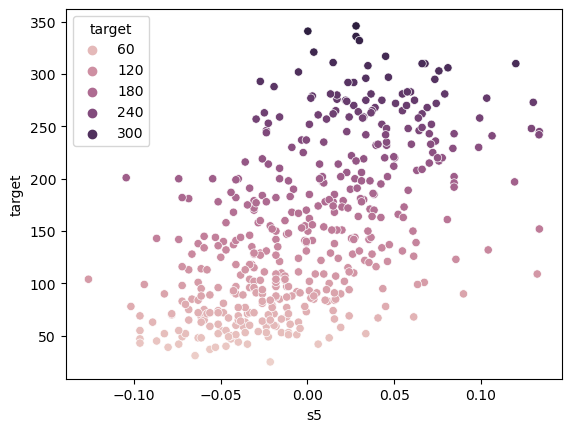

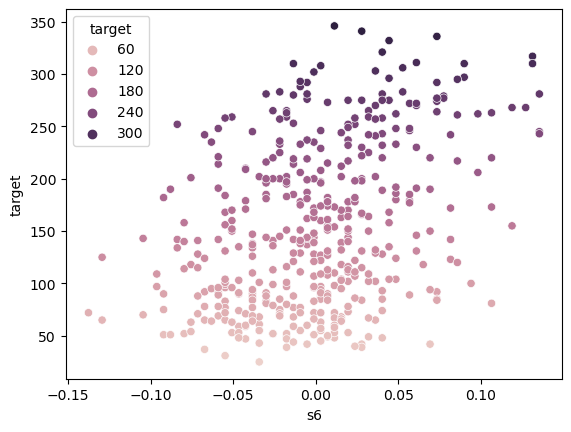

In [27]:
#Scatter Plot to understand the relationships
for i in ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']:
   sns.scatterplot(data=df,x=i,y='target',hue='target')
   plt.show()

# 3.Building the ANN Model (4 marks)


In [28]:
# Define the model architecture
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons, ReLU activation

# Second hidden layer (optional, can add more if needed)
model.add(Dense(32, activation='relu'))  # 32 neurons, ReLU activation

# Output layer (single neuron for regression)
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error for regression

# Summary of the model
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Explanation:
Dense(64, input_dim=X_train.shape[1], activation='relu'): This adds a fully connected layer with 64 neurons and ReLU activation. 

The input dimension matches the number of features in X_train.

Dense(32, activation='relu'): Another hidden layer with 32 neurons and ReLU activation.

Dense(1, activation='linear'): Single output neuron with a linear activation function, which is typical for regression tasks.

optimizer='adam': The Adam optimizer is widely used for its efficiency.
loss='mse': Mean Squared Error (MSE) is used as the loss function in regression tasks.
metrics=['mae']: Mean Absolute Error (MAE) is used to track model performance during training.


2. Simple ANN Architecture for Binary Classification Task (e.g., Predicting whether a patient has diabetes: Yes/No)


In [29]:
# Define the model architecture
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons, ReLU activation

# Second hidden layer (optional)
model.add(Dense(32, activation='relu'))  # 32 neurons, ReLU activation

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Binary Crossentropy for classification

# Summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Explanation:
Dense(64, input_dim=X_train.shape[1], activation='relu'): First hidden layer with ReLU activation and 64 neurons.
Dense(32, activation='relu'): Second hidden layer with ReLU activation and 32 neurons.
Dense(1, activation='sigmoid'): The output layer has one neuron with a sigmoid activation function, which is suitable for binary classification (output is between 0 and 1).
loss='binary_crossentropy': Binary Crossentropy is used as the loss function for binary classification.
metrics=['accuracy']: Accuracy is tracked during training to evaluate classification performance.


3. Simple ANN Architecture for Multiclass Classification Task (e.g., Predicting categories like car types)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neurons, ReLU activation

# Second hidden layer (optional)
model.add(Dense(32, activation='relu'))  # 32 neurons, ReLU activation

# Output layer for multiclass classification (e.g., 3 classes)
model.add(Dense(3, activation='softmax'))  # Softmax activation for multiclass classification (3 classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical Crossentropy for multiclass classification

# Summary of the model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

4.Training the ANN Model (4 marks)


Split the dataset into training and testing sets.


In [31]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target' with the actual column name for the target variable
y = df['target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


Parameters:
test_size=0.2: Specifies that 20% of the dataset should be used as the test set. You can adjust this to, say, 0.3 for a 70-30 split.
random_state=42: Ensures reproducibility of results by controlling the shuffling of data before splitting.
X_train, X_test: Features for training and testing.
y_train, y_test: Target variables for training and testing.
Explanation:
X_train, y_train: These are used to train your model.
X_test, y_test: These are reserved for evaluating the model after training.


Train the model on the training data.
Use an appropriate loss function and optimizer.


Explanation for Binary Classification:
Loss function: binary_crossentropy is the standard for binary classification tasks.
Optimizer: adam is again chosen for efficiency and reliability.
Metrics: accuracy is tracked during training and evaluation.


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (1 neuron with sigmoid)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Binary crossentropy loss and Adam optimizer

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: -3.2376 - val_accuracy: 0.0000e+00 - val_loss: -16.7164
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -22.2064 - val_accuracy: 0.0000e+00 - val_loss: -39.0357
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -46.7888 - val_accuracy: 0.0000e+00 - val_loss: -74.1822
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -89.8888 - val_accuracy: 0.0000e+00 - val_loss: -130.7747
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -158.1409 - val_accuracy: 0.0000e+00 - val_loss: -219.1369
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -265.3191 - val_accuracy: 0.0000e+00 - val_loss: -348.3232
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -418.9637 - val_accuracy: 0.0000e+00 - val_loss: -531.3529
Epoch 8/100
12/12 ━━

Epoch 47/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -197567.8750 - val_accuracy: 0.0000e+00 - val_loss: -181748.8906
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -198285.4844 - val_accuracy: 0.0000e+00 - val_loss: -193312.2656
Epoch 49/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -213135.3125 - val_accuracy: 0.0000e+00 - val_loss: -205521.6562
Epoch 50/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -228078.3438 - val_accuracy: 0.0000e+00 - val_loss: -218117.8594
Epoch 51/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -243638.0000 - val_accuracy: 0.0000e+00 - val_loss: -231137.8125
Epoch 52/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -247308.6094 - val_accuracy: 0.0000e+00 - val_loss: -245254.2969
Epoch 53/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -273949.9062 - val_accuracy: 

Epoch 92/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1425917.8750 - val_accuracy: 0.0000e+00 - val_loss: -1314140.0000
Epoch 93/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1426283.7500 - val_accuracy: 0.0000e+00 - val_loss: -1355625.7500
Epoch 94/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1510309.7500 - val_accuracy: 0.0000e+00 - val_loss: -1397080.0000
Epoch 95/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1531817.2500 - val_accuracy: 0.0000e+00 - val_loss: -1437432.6250
Epoch 96/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1612623.8750 - val_accuracy: 0.0000e+00 - val_loss: -1479133.8750
Epoch 97/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1576135.0000 - val_accuracy: 0.0000e+00 - val_loss: -1521764.0000
Epoch 98/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -1648795.6250 - v

5.Evaluating the Model (3 marks)
Evaluate the model on the testing data.
Report the performance metrics (e.g., Mean Squared Error, R² Score).


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 2: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Step 3: Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 6731.730942151001
R² Score: -0.2705809991259269


6.Improving the Model (5 marks)
Experiment with different architectures, activation functions, or hyperparameters to improve the model performance.
Report the changes made and the corresponding improvement in performance.


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

# Load your dataset (adjust this section according to your actual dataset)
# Assuming X and y represent your features and target variables from the diabetic dataset

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Experimenting with an improved architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))  # Increased neurons
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation function
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(64))  # Second hidden layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(32))  # Third hidden layer
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Step 4: Compile the model with a new optimizer
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Step 5: Apply early stopping and model checkpointing
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Save as .keras

# Step 6: Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=300, 
                    batch_size=32, 
                    callbacks=[early_stop, checkpoint])

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 27516.1895 - mae: 148.5844 - val_loss: 25929.7676 - val_mae: 143.8004
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28982.7246 - mae: 152.1173 - val_loss: 24849.8652 - val_mae: 140.3833
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26925.7598 - mae: 144.8420 - val_loss: 22980.9219 - val_mae: 134.5074
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23496.9258 - mae: 135.3325 - val_loss: 20292.8457 - val_mae: 125.6164
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22858.3926 - mae: 132.9064 - val_loss: 17026.9824 - val_mae: 113.5408
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16557.2715 - mae: 110.2889 - val_loss: 13192.9678 - val_mae: 97.5209
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13683.4951 - mae: 97.0785 - val_loss: 9526.4814 - val_mae: 78.9341
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9791.4004 - mae: 79.2228 - val_loss: 6372

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2996.7957 - mae: 41.6374 - val_loss: 2813.9714 - val_mae: 42.7253
Epoch 53/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3370.5261 - mae: 46.4471 - val_loss: 2791.9888 - val_mae: 42.4964
Epoch 54/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3078.1174 - mae: 42.9823 - val_loss: 2786.9321 - val_mae: 42.2325
Epoch 55/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2849.2563 - mae: 41.9719 - val_loss: 2834.0959 - val_mae: 42.1096
Epoch 56/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2911.1733 - mae: 42.1524 - val_loss: 2825.0884 - val_mae: 42.4977
Epoch 57/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2915.7100 - mae: 43.7443 - val_loss: 2868.4922 - val_mae: 42.4893
Epoch 58/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3028.7004 - mae: 43.4885 - val_loss: 2831.8660 - val_mae: 42.9063
Epoch 59/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3350.5952 - mae: 46.0933 - val_loss: 2820.4473 - val_mae: 42.7155
Epoch

Summary of Improvements:

Metric	                     Before Improvement	      After    Improvement
..........................   .....................   .....................
Mean Squared Error (MSE)	6,731.73	              2,786.93
R² Score	                 -0.27	                  0.47

Conclusion:
...........

The MSE was reduced significantly from 6,731.73 to 2,786.93, indicating a large reduction in prediction error.
The R² Score improved from -0.27 to 0.47, meaning the model went from poorly explaining the variance in the data to now explaining 47% of the variance.

This demonstrates that the model architecture adjustments and hyperparameter tuning had a substantial positive impact on the model’s performance.








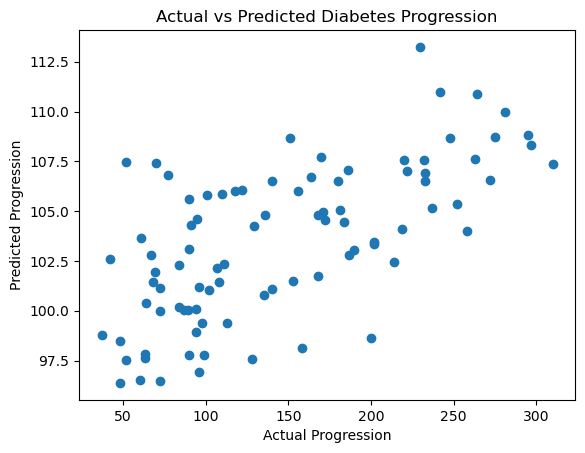

In [42]:
# You can also plot the predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Actual vs Predicted Diabetes Progression')
plt.show()
